In [0]:
import matplotlib.pyplot as plt
import seaborn              #data visualization tools
from IPython import display #Data를 연속적으로 출력

import numpy as np
import tensorflow as tf
import os

import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

from tensorflow.examples.tutorials.mnist import input_data


In [0]:
def plot_online(epoch, samples, size=1):
  fig,ax = plt.subplots(ncols = len(samples), figsize = (len(samples)*size,size))
  no_ticks = dict(left='off', bottom='off', labelleft='off', labelbottom='off')
  
  ax[0].set_ylabel('Epoch {}'.format(epoch))
  
  for index ,sample in enumerate(samples):
    ax[index].imshow(sample,cmap='gray')
    ax[index].tick_params(axis='both', which='both', **no_ticks)
  display.display(fig)
  plt.close()


def Encoder(xs):
  input_shape = tf.shape(xs)
  print(input_shape)
  Channels = [64,32]
  
  with tf.variable_scope("Conv_Enc",reuse = tf.AUTO_REUSE):
    #Layer1
    net = tf.layers.conv2d(xs,Channels[0],kernel_size=5,strides=1,padding='SAME',activation=tf.nn.relu)
    net = tf.layers.max_pooling2d(net,pool_size=[2,2],padding='SAME',strides=2)
    
    #Layer2
    net = tf.layers.conv2d(net,Channels[1],kernel_size=5,padding='SAME',strides=1,activation=tf.nn.relu)
    net = tf.layers.max_pooling2d(net,pool_size=[2,2],padding='SAME',strides=2)
    
    return net
    
    
def Decoder(encoded):
  Channels = [32,64,1]
  
  with tf.variable_scope("Conv_Dec", reuse = tf.AUTO_REUSE):
    deconv1 = tf.layers.conv2d_transpose(encoded,Channels[0],kernel_size = 5,padding='SAME',strides = 2,activation=tf.nn.relu) #7
    deconv2 = tf.layers.conv2d_transpose(deconv1,Channels[1],kernel_size = 5,padding='SAME',strides = 2,activation=tf.nn.relu) #14
    deconv3 = tf.layers.conv2d_transpose(deconv2,Channels[2],kernel_size = 5,padding='SAME',strides = 1,activation=tf.nn.relu) #28
    
    
    return deconv3
    
def AutoEncoder(xs):
  encoded = Encoder(xs)
  output = Decoder(encoded)
  
  return output
  

In [3]:
tf.reset_default_graph()
xs = tf.placeholder(tf.float32,shape = [None, 28,28,1],name = 'MNIST')

output = AutoEncoder(xs)

loss = tf.reduce_mean(tf.pow(xs-output,2))
optimize = tf.contrib.optimizer_v2.AdamOptimizer(0.001).minimize(loss)

Tensor("Shape:0", shape=(4,), dtype=int32)
Instructions for updating:
Use keras.layers.conv2d instead.
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use keras.layers.max_pooling2d instead.
Instructions for updating:
Use keras.layers.conv2d_transpose instead.


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
(10000, 28, 28, 1)
Epoch  0 , loss  0.098364666


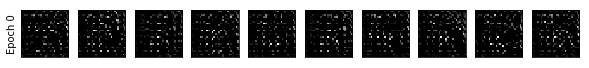

Epoch  1 , loss  0.064461574


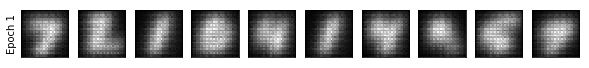

Epoch  2 , loss  0.044254508


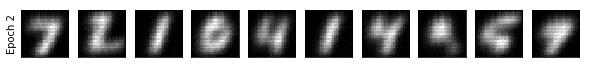

Epoch  3 , loss  0.027952516


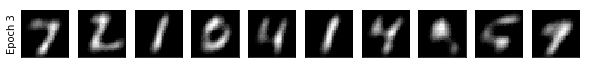

Epoch  4 , loss  0.02024815


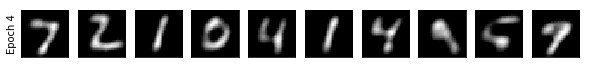

Epoch  5 , loss  0.015229728


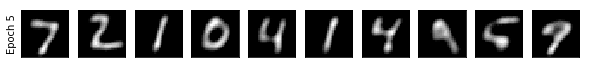

Epoch  6 , loss  0.011237816


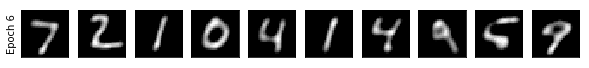

Epoch  7 , loss  0.009823635


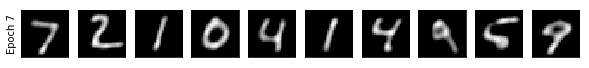

Epoch  8 , loss  0.007966422


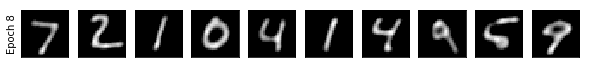

Epoch  9 , loss  0.007040553


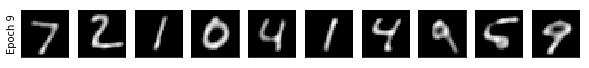

Epoch  10 , loss  0.006700805


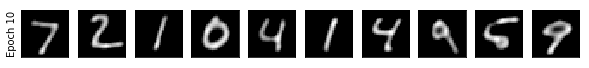

Epoch  11 , loss  0.006491742


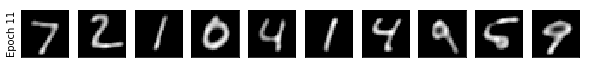

Epoch  12 , loss  0.0054021874


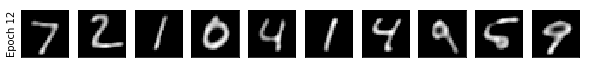

Epoch  13 , loss  0.0050323526


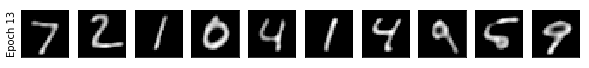

Epoch  14 , loss  0.0048077754


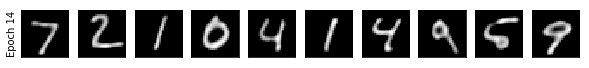

Epoch  15 , loss  0.004498157


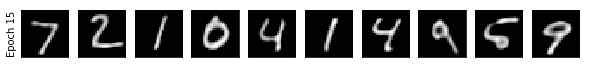

Epoch  16 , loss  0.004308774


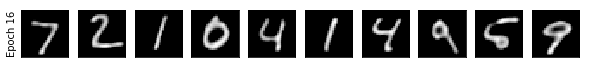

Epoch  17 , loss  0.0041909493


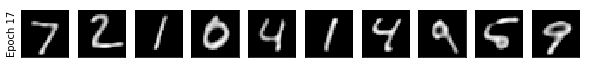

Epoch  18 , loss  0.004227606


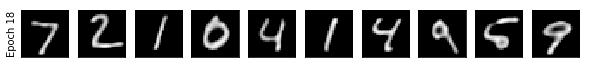

Epoch  19 , loss  0.0038555372


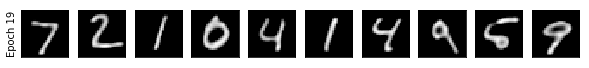

In [5]:
mnist = input_data.read_data_sets('MNIST_data/')
print(mnist.test.images.reshape([-1,28,28,1]).shape)

with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  
  for epoch in range(20):
    feed = {xs:mnist.test.images[0:10].reshape([-1,28,28,1])}
    _loss, outputs = sess.run([loss,output],feed_dict=feed)

    print('Epoch ',epoch,', loss ',_loss)
    plot_online(epoch,outputs[0:10].reshape([-1,28,28]))
    
    for iter in range(10):
      feed = {xs:mnist.train.images[1000*iter:1000*(iter+1)].reshape([-1,28,28,1])} #GPU 메모리 부족
      _ = sess.run(optimize,feed_dict=feed)